## SQLi Dataset Exploration

### Objectives
- Learn about SQL injections.
- Explore SQLi techniques


### SQL injection categories

There are three main categories of SQL injection: 

- In-band
- Out-of-band
- Inferential

In the following sections, you'll learn that each type describes how a SQL injection is initiated and how it returns the results of the attack.

#### In-band SQL injection

In-band, or classic, SQL injection is the most common type. An in-band injection is one that uses the same communication channel to launch the attack and gather the results.

For example, this might occur in the search box of a retailer's website that lets customers find products to buy. If the search box is vulnerable to injection, an attacker could enter a malicious query that would be executed in the database, causing it to return sensitive information like user passwords. The data that's returned is displayed back in the search box where the attack was initiated.

#### Out-of-band SQL injection

An out-of-band injection is one that uses a different communication channel  to launch the attack and gather the results.

For example, an attacker could use a malicious query to create a connection between a vulnerable website and a database they control. This separate channel would allow them to bypass any security controls that are in place on the website's server, allowing them to steal sensitive data

Note: Out-of-band injection attacks are very uncommon because they'll only work when certain features are enabled on the target server.

#### Inferential SQL injection

Inferential SQL injection occurs when an attacker is unable to directly see the results of their attack. Instead, they can interpret the results by analyzing the behavior of the system.

For example, an attacker might perform a SQL injection attack on the login form of a website that causes the system to respond with an error message. Although sensitive data is not returned, the attacker can figure out the database's structure based on the error. They can then use this information to craft attacks that will give them access to sensitive data or to take control of the system.

### Theory

The **SQL injection** is a code injection technique used to attack data-driven applications, in which malicious SQL statements are inserted in a way that it is executed.

There are diffrent **types of SQL injection attacks**:
- **Union-based SQLi:** 2 or more SQLi queries combined.
- **Error-based SQLi:** invalid query input that causes failure
- **Blind-based SQLi:** attacker choses moves based ib questions asked for the database (a type of DDos attacks) and it's the worse between the 3 of them.

![image](https://github.com/sondosaabed/Intro-to-GAN/assets/65151701/30662fc6-fa83-45d0-88bc-4fe4e2f0b396)

sources: https://www.researchgate.net/publication/364935556_A_comprehensive_review_of_methods_for_SQL_injection_attack_detection_and_prevention

attackers come up with new techniques all the time. 

### SQL injection categories

There are three main categories of SQL injection: 

- In-band
- Out-of-band
- Inferential

In the following sections, you'll learn that each type describes how a SQL injection is initiated and how it returns the results of the attack.

#### In-band SQL injection

In-band, or classic, SQL injection is the most common type. An in-band injection is one that uses the same communication channel to launch the attack and gather the results.

For example, this might occur in the search box of a retailer's website that lets customers find products to buy. If the search box is vulnerable to injection, an attacker could enter a malicious query that would be executed in the database, causing it to return sensitive information like user passwords. The data that's returned is displayed back in the search box where the attack was initiated.


#### Out-of-band SQL injection

An out-of-band injection is one that uses a different communication channel  to launch the attack and gather the results.

For example, an attacker could use a malicious query to create a connection between a vulnerable website and a database they control. This separate channel would allow them to bypass any security controls that are in place on the website's server, allowing them to steal sensitive data

Note: Out-of-band injection attacks are very uncommon because they'll only work when certain features are enabled on the target server.


#### Inferential SQL injection

Inferential SQL injection occurs when an attacker is unable to directly see the results of their attack. Instead, they can interpret the results by analyzing the behavior of the system.

For example, an attacker might perform a SQL injection attack on the login form of a website that causes the system to respond with an error message. Although sensitive data is not returned, the attacker can figure out the database's structure based on the error. They can then use this information to craft attacks that will give them access to sensitive data or to take control of the system.

### Dataset Exploration

In [1]:
import numpy as np 
import pandas as pd 
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

- Loading the dataset into a dataframe

In [2]:
df = pd.read_csv("/kaggle/input/sql-injection-dataset/SQLiV3.csv")

- Exploring the dataset

In [3]:
def missing_values(df):
    """
    This is to get the percetages of missing data
    Args:
        df (pd.Dataframe): contains the data
    Returns:
        missing_percetanges(pd.Dataframe): contains Column,	Counts, and	Percentage
            of the missing values for eah colmn
    """
    missing_count = df.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': missing_count.values / len(df) * 100  
    })
    return  missing_percetanges

In [4]:
def explore_sample(sample):
    """
    Exploring a dataset sample
    Args:
        sample (pd.Dataframe): the dataset sample to explore.
    Returns:
        results (dict): containing results of each exploration with the title as key
    """
    head = pd.DataFrame(sample.head())
    tail = pd.DataFrame(sample.tail())
    nunique = pd.DataFrame(sample.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(sample.describe())
    dtypes =  pd.DataFrame(sample.dtypes, columns=["Datatype"])
    results = {
        'Table 3: Dataset Head:':head,
        'Table 4: Dataset Tail:':tail,
        'Table 5: Dataset Numerical Describtion: ':describe,
        'Table 6: Missing Values By Percentage': missing_values(sample), 
        'Table 7: Dataset Columns Data types: ':dtypes,
        'Table 8: Number of uniques in the datasets:':nunique}
    return results

In [5]:
def print_dataset_exploration(results):
    """
    Prints a beautufil display of each of the exploration dataframe
    Args:
        results (dict): contains exploration outputs with the title as key
    Returns:
        nothing
    """
    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Table 6: Missing Values By Percentage':
            print("Total Sum of Missing Percetange: ", dataframe['Percentage'].sum())
        display(dataframe)

In [6]:
results = explore_sample(df)
print_dataset_exploration(results)

Table 3: Dataset Head:


,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN


Table 4: Dataset Tail:


,Sentence,Label,Unnamed: 2,Unnamed: 3
30914,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
30915,DELETE FROM tomorrow,0,NaN,NaN
30916,SELECT wide ( s ) FROM west,0,NaN,NaN
30917,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN
30918,SELECT TOP 3 * FROM race,0,NaN,NaN


Table 5: Dataset Numerical Describtion: 


,Unnamed: 3
count,9.000000
mean,0.222222
std,0.440959
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Table 6: Missing Values By Percentage
Total Sum of Missing Percetange:  199.85445842362302


,Column,Counts,Percentage
0,Sentence,15,0.048514
1,Label,255,0.824736
2,Unnamed: 2,30613,99.010317
3,Unnamed: 3,30910,99.970892


Table 7: Dataset Columns Data types: 


,Datatype
Sentence,object
Label,object
Unnamed: 2,object
Unnamed: 3,float64


Table 8: Number of uniques in the datasets:


,#_of_Unique
Sentence,30872
Label,42
Unnamed: 2,6
Unnamed: 3,2


- Sentences SQLi visualizaion

(-0.5, 399.5, 199.5, -0.5)

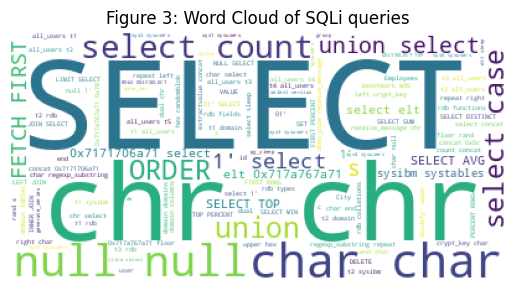

In [7]:
words = ' '.join(df['Sentence'].dropna())
wordcloud = WordCloud(background_color='white').generate(words)
plt.imshow(wordcloud)
plt.title('Figure 3: Word Cloud of SQLi queries')
plt.axis('off')